# 검색결과 정리 


* 엑셀 형식의 입력 파일을 받아서, 엑셀형식의 출력 파일을 생성함 

* input_file  : kibana에서 검색한 결과 파일(ex, P05.xlsx)
* output_file :  (ex, P05_out.xlsx)


In [1]:
import pandas as pd 
from pandas import DataFrame, Series

print(pd.__version__)

0.19.2


In [8]:
# 파일 불러오기 
# 입력파일 이름 

filenameIn  = "P05_input.xlsx"
#filenameIn  = "P11_input.xlsx"

# 출력파일 이름 
filenameOut = filenameIn.split('.')[0] + '_out' + '.xlsx'
print(">>> Input file :{}, output file :{}".format(filenameIn, filenameOut))

xls1    = pd.ExcelFile(filenameIn)
sheet   = xls1.sheet_names
df    = xls1.parse(sheet[0])

# 컬럼 이름 정리하기 
print(df.columns)
df.columns = [each.strip() for each in df.columns.tolist()]
print(df.columns)
df2   = df.sort_values(by=['AWARD_ID'], ascending = [0]) 
print(df2.shape)


>>> Input file :P05_input.xlsx, output file :P05_input_out.xlsx
Index(['year  ', 'AWARD_AMOUNT  ', 'AWARD_ID  ', 'AWARD_TITLE  '], dtype='object')
Index(['year', 'AWARD_AMOUNT', 'AWARD_ID', 'AWARD_TITLE'], dtype='object')
(550, 4)


In [9]:
# 중복 제거하기 

df3 = df2.drop_duplicates()
print(df3.shape)


# NaN 데이터 제거하기
df4 = df3.dropna()
print(df4.shape)

#print(df4)

(93, 4)
(92, 4)


In [10]:
# 정렬하기
df5 = df4.sort_values(by=['AWARD_ID'], ascending = [0]) 

#형 변환하기 
#df5[['AWARD_AMOUNT']] = df4[['AWARD_AMOUNT']].astype(float)
#df5[['year']] = df5[['year']].astype(int)
#print(df5.shape)


In [11]:
# 합계 내기 
grouped = df5[['year','AWARD_AMOUNT']].groupby('year')

dfr1         = grouped.sum()
dfr1['count']= grouped.count()
dfr1['mean'] = grouped.mean()
dfr1['year'] = dfr1.index


print(dfr1)

      AWARD_AMOUNT  count           mean  year
year                                          
13.0     8253047.0     23  358828.130435  13.0
14.0    15640471.0     30  521349.033333  14.0
15.0    12359059.0     39  316898.948718  15.0


In [12]:
# 엑셀파일로 저장하기

# 컬럼 순서 정리 
df6 = df5[['AWARD_ID','year','AWARD_AMOUNT', 'AWARD_TITLE']]
dfr12 = dfr1[['year','count','AWARD_AMOUNT','mean']]


writer = pd.ExcelWriter(filenameOut, engine='xlsxwriter')
df6.to_excel(writer,'Project_list', encoding='utf-8',  index = False) 
dfr12.to_excel(writer,'Project_sum', encoding='utf-8', index = False) 
writer.save()

print(">>> file saved")

>>> file saved


# 데이터 시각화 

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sns.set(color_codes=True)

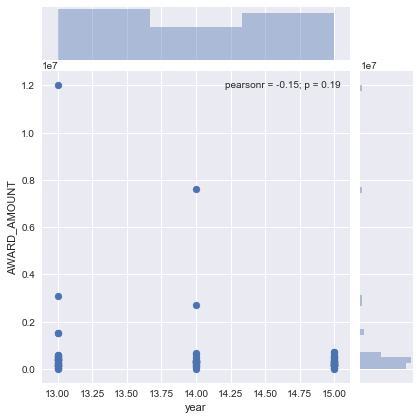

In [9]:
# 연도별  과제분포 

sns.jointplot(x="year", y="AWARD_AMOUNT", data=df5)


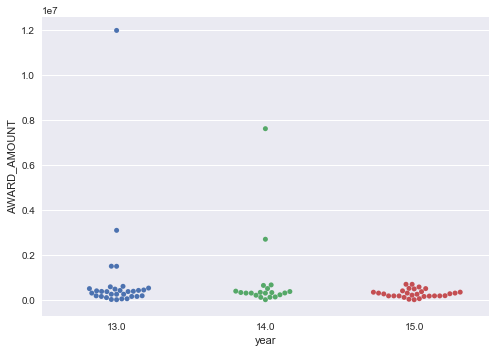

In [9]:
# 오버래핑을 방지함 

sns.swarmplot(x="year", y="AWARD_AMOUNT", data=df5)



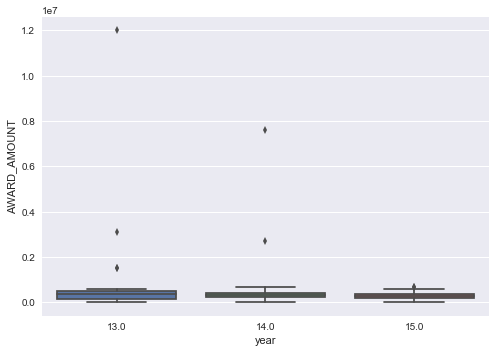

In [11]:

sns.boxplot(x="year", y="AWARD_AMOUNT", data=df5)


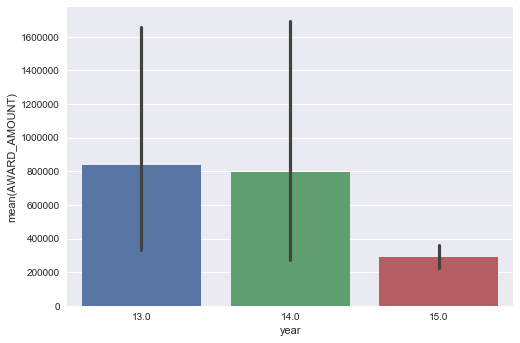

In [12]:
sns.barplot(x="year", y="AWARD_AMOUNT", data=df5)


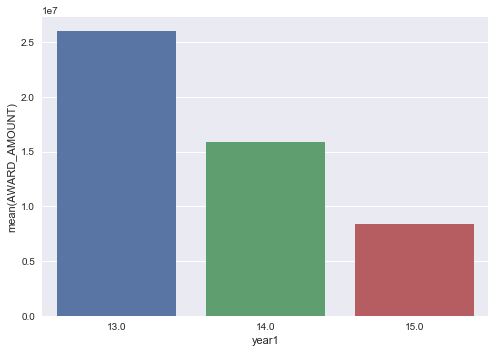

In [13]:
dfr1['year1'] = dfr1.index 
sns.barplot(x = "year1",   y = "AWARD_AMOUNT", data=dfr1)